In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [3]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/fruit/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/fruit/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [18]:
# Dat ten cho cac classes
classes = ['apple', 'banana', 'coconut', 'grape', 'grapefruit', 'lime', 'mango', 'orange', 'strawberry', 'watermelon']

In [4]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [5]:
history=model.fit(training_set,
                  steps_per_epoch=len(training_set),
                  batch_size = 64,
                  epochs=100,
                  validation_data=test_set,
                  validation_steps=len(test_set),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
4/4 [==============================] - 34s 7s/step - loss: 13.0498 - accuracy: 0.1000 - val_loss: 2.9038 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 2s 731ms/step - loss: 2.4601 - accuracy: 0.0900 - val_loss: 2.1925 - val_accuracy: 0.1667
Epoch 3/100
4/4 [==============================] - 2s 535ms/step - loss: 2.2268 - accuracy: 0.1800 - val_loss: 2.0594 - val_accuracy: 0.2333
Epoch 4/100
4/4 [==============================] - 2s 515ms/step - loss: 1.9730 - accuracy: 0.3200 - val_loss: 1.8554 - val_accuracy: 0.2333
Epoch 5/100
4/4 [==============================] - 2s 530ms/step - loss: 1.7903 - accuracy: 0.3900 - val_loss: 2.3792 - val_accuracy: 0.2333
Epoch 6/100
4/4 [==============================] - 2s 710ms/step - loss: 2.0030 - accuracy: 0.2200 - val_loss: 2.0691 - val_accuracy: 0.2333
Epoch 7/100
4/4 [==============================] - 2s 544ms/step - loss: 1.8638 - accuracy: 0.3200 - val_loss: 1.8697 - val_accuracy: 0.2333
Epoch 8/100
4/

In [6]:
model.save('fruit_CNN.h5')

In [7]:
from keras.models import load_model
models = load_model('fruit_CNN.h5')

In [9]:
score = model.evaluate(test_set,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

1/1 [==============================] - 1s 523ms/step - loss: 3.1224 - accuracy: 0.5667
Test loss=  3.12239670753479
Test accuracy=  0.5666666626930237


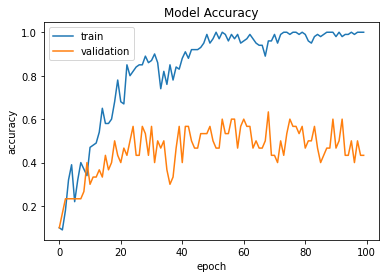

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

watermelon


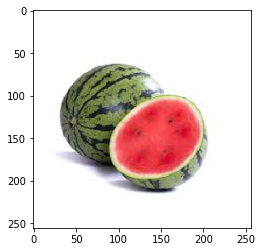

In [25]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('duahau.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])